# <font color='#F37126'> Análise descritiva dos dados </font>

## 0.0. Imports

In [1]:
import pandas as pd
import numpy  as np

from sqlalchemy import create_engine
from IPython.display import Image

## 0.1. Coleta dos dados

In [2]:
path = '/home/judson/Documents/repos/hm_project/'
database_name = 'database_hm.sqlite'
conn = create_engine( 'sqlite:///' + path + database_name, echo=False )

In [3]:
query = """
    SELECT * FROM vitrine
"""

In [4]:
df_raw = pd.read_sql( query, con=conn )

In [9]:
df_raw.tail()

,product_id,style_id,color_id,product_name,color_name,fit,price,size_number,size_model,cotton,polyester,spandex,elasterell,scrapy_datetime
46,0938875007,0938875,007,slim_tapered_jeans,black,slim_fit,39.99,188,31/32,1.0,0.00,0.01,0.0,2021-12-28 20:27:03
47,0938875008,0938875,008,slim_tapered_jeans,denim_blue,slim_fit,29.99,187,31/32,1.0,0.00,0.01,0.0,2021-12-28 20:27:03
48,0974597006,0974597,006,slim_tapered_jeans,dark_gray,slim_fit,29.99,None,None,1.0,0.00,0.02,0.0,2021-12-28 20:27:03
49,0974597001,0974597,001,slim_tapered_jeans,denim_blue,slim_fit,29.99,186,31/32,1.0,0.00,0.01,0.0,2021-12-28 20:27:03
50,1028865001,1028865,001,relaxed_jeans_with_embroidery_detail,light_denim_blue/smiley®,relaxed_fit,49.99,186,None,1.0,0.65,0.00,0.0,2021-12-28 20:27:03


# 1.0. Passo 01 - Descrição dos dados

In [6]:
df01 = df_raw.copy()

## 1.1. Dimensão dos dados

In [8]:
print( f'Number of Rows: {df01.shape[0]}' )
print( f'Number of Cols: {df01.shape[1]}' )

Number of Rows: 51
Number of Cols: 14


## 1.2. Tipo dos dados 

In [54]:
df01.dtypes

product_id          object
style_id            object
color_id            object
product_name        object
color_name          object
fit                 object
price              float64
size_number         object
size_model          object
cotton             float64
polyester          float64
spandex            float64
elasterell         float64
scrapy_datetime     object
dtype: object

In [55]:
# convert object to datetime
df01['scrapy_datetime'] = pd.to_datetime( df01['scrapy_datetime'] )

In [56]:
df01.dtypes

product_id                 object
style_id                   object
color_id                   object
product_name               object
color_name                 object
fit                        object
price                     float64
size_number                object
size_model                 object
cotton                    float64
polyester                 float64
spandex                   float64
elasterell                float64
scrapy_datetime    datetime64[ns]
dtype: object

## 1.3. Identificação de dados faltantes

In [57]:
df01.isna().sum()

product_id          0
style_id            0
color_id            0
product_name        0
color_name          0
fit                 0
price               0
size_number        18
size_model         24
cotton              0
polyester           0
spandex             0
elasterell          0
scrapy_datetime     0
dtype: int64

In [58]:
df01.isna().sum() / df01.shape[0]

product_id         0.000000
style_id           0.000000
color_id           0.000000
product_name       0.000000
color_name         0.000000
fit                0.000000
price              0.000000
size_number        0.352941
size_model         0.470588
cotton             0.000000
polyester          0.000000
spandex            0.000000
elasterell         0.000000
scrapy_datetime    0.000000
dtype: float64

## 1.4. Substituição de dados faltantes 

In [59]:
df_01 = df01.drop( columns=['size_number', 'size_model'] ).dropna()
df_01.shape

(51, 12)

## 1.5. Descrição dos dados

In [60]:
num_attributes = df_01.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df_01.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.5.1. Dados numéricos

In [61]:
# tendencia central - media, mediana
t1 = pd.DataFrame ( num_attributes.apply( np.mean ) ).T
t2 = pd.DataFrame ( num_attributes.apply( np.median ) ).T

# dispersão - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame ( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame ( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concat
m1 = pd.concat( [d2, d3, d4, t1, t2, d1, d5, d6] ).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'media', 'mediana', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,media,mediana,std,skew,kurtosis
0,price,14.99,49.99,35.00,30.127255,29.99,9.777966,0.438422,-0.848709
1,cotton,0.77,1.00,0.23,0.957843,0.99,0.070747,-1.890872,2.177997
2,polyester,0.00,1.00,1.00,0.272745,0.00,0.314300,0.529472,-1.446507
3,spandex,0.00,0.02,0.02,0.013333,0.01,0.006157,-0.365544,-0.607877
4,elasterell,0.00,0.08,0.08,0.009412,0.00,0.025775,2.446002,4.143991


#### mínimo

- Menor valor do conjunto de dados

#### máximo

- Maior valor do conjunto de dados

#### intervalo ( range )

- Estimativa de variabilidade ou dispersão
- Definição: A diferença entre o valor máximo e o valor mínimo

#### média

- Definição: A média é a soma de todos os valores do conjunto de dados dividido pelo número de valores
- Exemplo: [3, 5, 1, 2]
    - Média ( 3 + 5 + 1 + 2 ) / 4 = 2.75
    - Média com outlier: (3 + 5 + 1 + 2 + 1500 ) = 302.2

In [66]:
np.mean( [3, 5, 1, 2])

2.75

#### mediana

- Definição: A mediana é o número do meio de uma lista ordenada
- Exemplo par: [3, 5, 1, 2]
- Mediana:
    - Ordenação dos dados: [1, 2, 3, 5]
    - Vou até a posição central: ( 2 + 3 ) / 2 = 2.5
    
- Exemplo ímpar: [7, 1, 10, 3, 6]
- Mediana:
    - Ordenação dos dados: [1, 3, 6, 7, 10]
    - Vou até a posição central: 6

- Exemplo outlier: [7, 1, 1500, 3, 6]
- Mediana:
    - Ordenação dos dados: [1, 3, 6, 7, 1500]
    - Vou até a posição central: 6

#### desvio padrão

- Estimativa de variabilidade ou dispersão
    - Definição: Mede os valores do conjunto de dados que estão próximo ou espalhados em torno de um ponto central.
    
- Exemplo: [1, 5, 7, 10, 15] -> média: 7.6

- Desvio: A diferença entre os valores obeservados e a estimativa de localização ( média ou mediana ).  Mostra quão dispersos os dados estão em torno da média.
- Desvio:
    - 1 - 7.6 = -6.6
    - 5 - 7.6 = -2.6
    - 7 - 7.6 = -0.6
    - 10 - 7.6 = 2.4
    - 15 - 7.6 = 7.4


- Variância: A soma dos desvio da média ao quadrado dividido por n-1, onde n é o número de valores do meu conjunto de dados ( amostra ). Resume os desvios em um único número.
    - 1 - 7.6 = (-6.6)**2 = 43.56
    - 5 - 7.6 = (-2.6)**2 = 6.76
    - 7 - 7.6 = (-0.6)**2 = 0.36
    - 10 - 7.6 = (2.4)**2 = 5.76
    - 15 - 7.6 = (7.4)**2 = 54.76

    ( 43.56 + 6.76 + 0.36 + 5.76 + 54.76 ) = 111.20 / (5 -1) = 27.8 ( 27.8 l**2 )

- Desvio padrão: A raíz quadrada da variância. O desvio padrão é muito fácil de interpretar do que a variância, pois essa métrica está na mesma escala dos dados originais.

    - 1 - 7.6 = (-6.6)**2 = 43.56
    - 5 - 7.6 = (-2.6)**2 = 6.76
    - 7 - 7.6 = (-0.6)**2 = 0.36
    - 10 - 7.6 = (2.4)**2 = 5.76
    - 15 - 7.6 = (7.4)**2 = 54.76

    ( 43.56 + 6.76 + 0.36 + 5.76 + 54.76 ) = 111.20 / (5 -1) = 27.8 = sqrt( 27.8 ) = 5.27
        
     
        

In [70]:
np.std( [1, 5, 7, 10, 15], ddof=1 )

5.272570530585627

#### skewness

- Definição: É a medida do quanto uma distribuição de dados desvia de uma distribuição normal. Para uma distribuição normal não temos skewness, ou seja, os dados estão distribuidos perfeitamente ao redos da média.

- Skewness Positiva e Negativa
    - Mediana > Média = Deslocamento para a diretia = Skewness Negativa
    - Mediana = Média = Não tem deslocamento = Não tenho Skewness
    - Mediana < Média = Deslocamento para a esquerda = Skewness Positiva

- Como interpretar a Skewness no dados:
    - A Skewness mostra a concentração dos dados de um lado da média.
    - Algoritmos de ML precisam treinar com dados não enviesados, ou seja, a distribuição da variável resposta ( alvo ) precisa ser o mais próximo de uma distribuição normal.

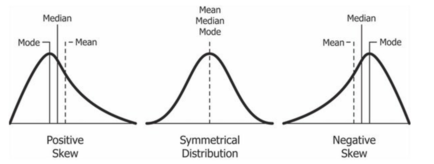

In [79]:
img_path = '/home/judson/Documents/repos/hm_project/'
Image( img_path + 'skewness.png', width = 600, height = 300 )

#### kurtosis

- Kurtosis descreve a distribuição dos dados em torno da média.
- Evidencia uma distribuição de caudas longas ( probabilidade baixa de acontecer valores extremos )

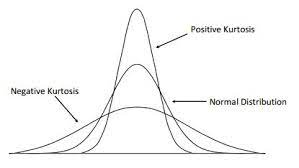

In [84]:
Image( path + 'kurtosis.jpeg', width = 500, height = 250 )

#### Momentos da Estatística

- Momento 1: Estimativa de Localização ( Média ou mediana )
- Momento 2: Estimativa de Variabilidade ( Desvios, Variância, Desvio Padrão, intervalos )
- Momento 3: Skewness ( Assimetria da distribuição dos dados em relação a média )
- Momento 4: Kurtosis ( Evidência de caudas longas ( probabilidade de acontecer valor extremo ) )

### 1.5.2. Dados categóricos

# 2.0. Passo 02 - Feature Engineering

# 3.0. Passo 03 - Filtragem de atributos

# 4.0. Passo 04 - EDA (Exploratory Data Analysis)